In [171]:
# !pip install sktime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.utils.plotting import plot_series

In [173]:
df = pd.read_csv("imdb_ts.csv")
df.head()

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


In [174]:
df = pd.DataFrame(df)

# Selezioniamo solo le colonne numeriche (cioè i punti temporali)

time_series_columns = df.columns[1:-3]
df_time_series = df[time_series_columns]

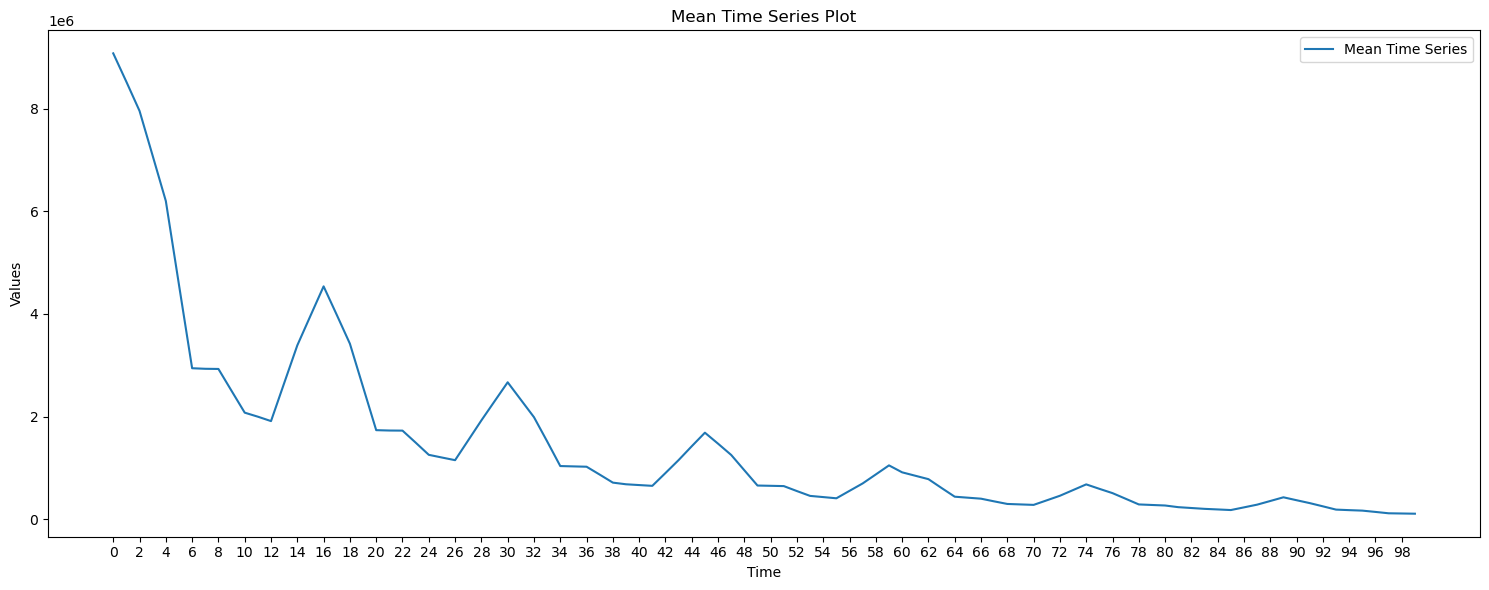

In [175]:
# Calcola la media per ciascun punto temporale
mean_time_series = df_time_series.mean(axis=0)

# Plot della media
plt.figure(figsize=(15, 6))
plt.plot(mean_time_series.index, mean_time_series.values, label='Mean Time Series')

# Etichette ogni due unità
plt.xticks(ticks=mean_time_series.index[::2], labels=mean_time_series.index[::2])

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Mean Time Series Plot')
plt.legend()
plt.tight_layout()
plt.show()


In [176]:
mean_time_series.describe()

count    1.000000e+02
mean     1.468074e+06
std      1.798588e+06
min      1.111532e+05
25%      3.730403e+05
50%      7.501715e+05
75%      1.782023e+06
max      9.075217e+06
dtype: float64

# Missing Values

In [177]:
ts_missing = df_time_series.copy().to_numpy()

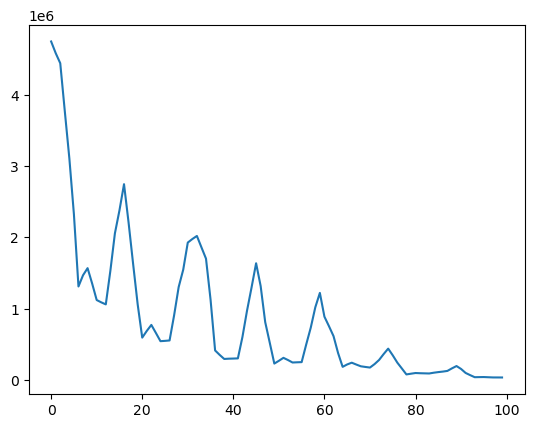

In [178]:
plt.plot(ts_missing[6])
plt.show()

In [179]:
# Conta i valori mancanti per serie
missing_per_series = df.isnull().sum()

# Conta il totale dei valori mancanti
total_missing = df.isnull().sum().sum()

# Mostra i risultati
print("Missing values per series:")
print(missing_per_series)
print("\nTotal missing values in the dataset:", total_missing)

Missing values per series:
id                 0
0                  0
1                  0
2                  0
3                  0
                  ..
98                 0
99                 0
rating             0
genre              0
rating_category    0
Length: 104, dtype: int64

Total missing values in the dataset: 0


Ci sono 0 missing values, quindi non proseguiamo con tecniche che maneggiano i missing values

# Anomalies

In [180]:
from sktime.transformations.series.func_transform import FunctionTransformer

## Hampel Filter

In [181]:
from sktime.transformations.series.outlier_detection import HampelFilter

In [182]:
ts_anom = df_time_series.copy().to_numpy()
df_time_series

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,32571.0,...,13925.0,14370.0,12577.0,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0
1,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,1449.0,...,1995.0,1972.0,1251.0,637.0,734.0,857.0,785.0,724.0,713.0,699.0
2,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,119608.0,...,16273.0,14396.0,10518.0,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0
3,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,7697.0,...,28490.0,24336.0,22421.0,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0
4,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,3108057.0,...,43164.0,55339.0,69774.0,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1077363.0,1061148.0,1043451.0,912840.0,738595.0,508118.0,296236.0,318113.0,341113.0,310422.0,...,6286.0,4324.0,3367.0,2396.0,2425.0,2461.0,2223.0,1920.0,1991.0,2051.0
1130,56775.0,57750.0,58828.0,53549.0,48484.0,37340.0,19243.0,30804.0,55897.0,40874.0,...,1283.0,1313.0,1026.0,739.0,618.0,488.0,636.0,883.0,904.0,920.0
1131,3595005.0,3401235.0,3221227.0,2645775.0,2188725.0,1681250.0,1030698.0,1138724.0,1290788.0,1204996.0,...,347594.0,437395.0,396059.0,345246.0,257388.0,182883.0,165311.0,144119.0,128009.0,111756.0
1132,528167.0,617409.0,696127.0,741481.0,802782.0,527997.0,177249.0,141753.0,100026.0,88004.0,...,35691.0,28066.0,18733.0,10108.0,10511.0,10878.0,7491.0,3752.0,5237.0,6592.0


In [183]:
# here we lower the threshold to detect more outliers (default n_sigma is 3)
annotator = HampelFilter(window_length=12, n_sigma=3, return_bool=True)

In [184]:
import pandas as pd
import numpy as np

# Supponiamo che df sia il tuo DataFrame originale
# Seleziona solo le colonne numeriche della serie temporale
time_series_cols = [str(i) for i in range(100)]  # oppure range(100) se le colonne sono numeriche
df[time_series_cols] = df[time_series_cols].apply(pd.to_numeric, errors='coerce')

def hampel_filter(input_series, window_size=3, n_sigmas=3):
    k = 1.4826  # Fattore di scala per distribuzione normale
    rolling_median = input_series.rolling(window=2*window_size, center=True).median()
    MAD = (input_series - rolling_median).abs().rolling(window=2*window_size, center=True).median()
    threshold = n_sigmas * k * MAD
    difference = (input_series - rolling_median).abs()
    return (difference > threshold).astype(int)

# Applica il filtro Hampel riga per riga
hampel = df[time_series_cols].apply(lambda row: hampel_filter(row), axis=1)

# anomalies_df ora contiene 1 per anomalie e 0 per valori normali


In [185]:
# Aggiungi una colonna con la somma delle anomalie per ogni riga
hampel['sum_anomalies'] = hampel.sum(axis=1)
hampel

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sum_anomalies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [186]:
hampel['sum_anomalies'].describe()

count    1134.000000
mean        0.789242
std         1.097469
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        11.000000
Name: sum_anomalies, dtype: float64

In [187]:
hampel['sum_anomalies'].sum()

895

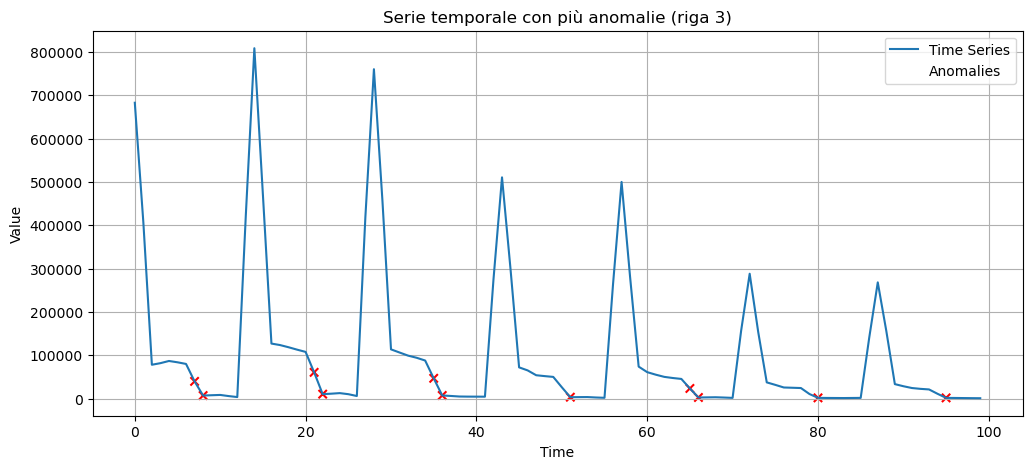

In [188]:
# Trova la riga con il maggior numero di anomalie
max_anomalies_row = hampel['sum_anomalies'].idxmax()

# Estrai la serie temporale e le etichette di anomalie per quella riga
ts = df.loc[max_anomalies_row, time_series_cols].values
labels = hampel.loc[max_anomalies_row, time_series_cols].values

# Plot della serie temporale con anomalie
plt.figure(figsize=(12, 5))
plt.plot(ts.ravel(), label='Time Series')
plt.scatter(np.arange(len(labels)), ts, alpha=labels, color="red", marker="x", label='Anomalies')
plt.title(f"Serie temporale con più anomalie (riga {max_anomalies_row})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Grubbs Test

In [189]:
from scipy import stats

In [190]:
# Seleziona solo le colonne numeriche della serie temporale
time_series_cols = [str(i) for i in range(100)]  # oppure range(100) se le colonne sono numeriche
df[time_series_cols] = df[time_series_cols].apply(pd.to_numeric, errors='coerce')

In [191]:
def grubbs_test(ts, alpha=0.05):
    z_scores = np.abs(stats.zscore(ts))
    threshold = stats.t.ppf((1 + (1-alpha))/2, len(ts) - 2)
    return (z_scores > threshold).astype(int)

# Applica il filtro Hampel riga per riga
grubbs = df[time_series_cols].apply(lambda row: grubbs_test(row), axis=1)

In [192]:
# Aggiungi una colonna con la somma delle anomalie per ogni riga
grubbs['sum_anomalies'] = grubbs.sum(axis=1)
grubbs

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sum_anomalies
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1130,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
1131,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1132,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [193]:
grubbs['sum_anomalies'].describe()

count    1134.000000
mean        5.784832
std         1.273499
min         0.000000
25%         5.000000
50%         6.000000
75%         6.000000
max        12.000000
Name: sum_anomalies, dtype: float64

In [194]:
grubbs['sum_anomalies'].sum()

6560

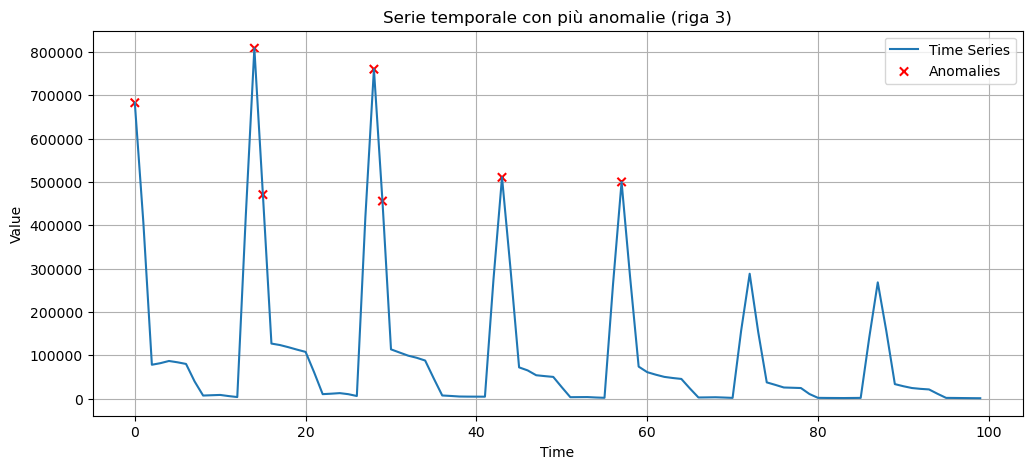

In [195]:
# Trova la riga con il maggior numero di anomalie
max_anomalies_row = grubbs['sum_anomalies'].idxmax()

# Estrai la serie temporale e le etichette di anomalie per quella riga
ts = df.loc[3, time_series_cols].values
labels = grubbs.loc[3, time_series_cols].values

# Plot della serie temporale con anomalie
plt.figure(figsize=(12, 5))
plt.plot(ts.ravel(), label='Time Series')
plt.scatter(np.arange(len(labels)), ts, alpha=labels, color="red", marker="x", label='Anomalies')
plt.title(f"Serie temporale con più anomalie (riga {3})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

## IQR

In [196]:
# Seleziona solo le colonne numeriche della serie temporale
time_series_cols = [str(i) for i in range(100)]  # oppure range(100) se le colonne sono numeriche
df[time_series_cols] = df[time_series_cols].apply(pd.to_numeric, errors='coerce')

In [197]:
def iqr_outliers(x, k=3):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers).astype(int)

# Applica il filtro Hampel riga per riga
iqr = df[time_series_cols].apply(lambda row: iqr_outliers(row), axis=1)

In [198]:
iqr = pd.DataFrame(iqr.tolist())

iqr = pd.DataFrame(iqr)

In [199]:
iqr

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Aggiungi una colonna con la somma delle anomalie per ogni riga
iqr['sum_anomalies'] = iqr.sum(axis=1)
iqr

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sum_anomalies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1132,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [201]:
iqr['sum_anomalies'].describe()

count    1134.000000
mean        4.007937
std         2.779468
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: sum_anomalies, dtype: float64

In [202]:
iqr['sum_anomalies'].sum()

4545

In [203]:
print(iqr.columns)

Index([              0,               1,               2,               3,
                     4,               5,               6,               7,
                     8,               9,
       ...
                    91,              92,              93,              94,
                    95,              96,              97,              98,
                    99, 'sum_anomalies'],
      dtype='object', length=101)


In [204]:
time_series_cols = list(map(int, time_series_cols))

In [205]:
# # Trova la riga con il maggior numero di anomalie
# max_anomalies_row = iqr['sum_anomalies'].idxmax()

# # Estrai la serie temporale e le etichette di anomalie per quella riga
# # time_series_cols = list(range(iqr.shape[1] - 1))  # esclude 'sum_anomalies'
# ts = df.loc[3, time_series_cols].values
# labels = iqr.loc[3, time_series_cols].values

# # Plot della serie temporale con anomalie
# plt.figure(figsize=(12, 5))
# plt.plot(ts.ravel(), label='Time Series')
# plt.scatter(np.arange(len(labels)), ts, alpha=labels, color="red", marker="x", label='Anomalies')
# plt.title(f"Serie temporale con più anomalie (riga {3})")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.legend()
# plt.grid(True)
# plt.show()


## 2 over 3

In [206]:
# Calcolo della nuova matrice: 1 se almeno due su tre sono 1
new_matrix = (hampel + grubbs + iqr) >= 2

# Conversione da booleano a intero
new_matrix = new_matrix.astype(int)

# Visualizzazione di esempio
new_matrix

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,sum_anomalies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


0 outliers

# Normalization

In [207]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor

In [208]:
from sklearn.preprocessing import StandardScaler

### Z-score normalization (Amplitude Scaling)

In [209]:
scaler = TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True)

In [210]:
df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,1077363.0,1061148.0,1043451.0,912840.0,738595.0,508118.0,296236.0,318113.0,341113.0,...,2396.0,2425.0,2461.0,2223.0,1920.0,1991.0,2051.0,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,56775.0,57750.0,58828.0,53549.0,48484.0,37340.0,19243.0,30804.0,55897.0,...,739.0,618.0,488.0,636.0,883.0,904.0,920.0,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,3595005.0,3401235.0,3221227.0,2645775.0,2188725.0,1681250.0,1030698.0,1138724.0,1290788.0,...,345246.0,257388.0,182883.0,165311.0,144119.0,128009.0,111756.0,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,528167.0,617409.0,696127.0,741481.0,802782.0,527997.0,177249.0,141753.0,100026.0,...,10108.0,10511.0,10878.0,7491.0,3752.0,5237.0,6592.0,7.4,"['Biography', 'Drama', 'History']",High


In [ ]:
# Seleziona le colonne della time series (da 0 a 99 come stringhe o interi)
time_series_columns = [str(i) for i in range(100)]  # o range effettivo delle tue colonne

# Estrai solo i dati delle time series
time_series_data = df[time_series_columns]

# Standardizzazione per riga (z-score)
time_series_scaled = time_series_data.sub(time_series_data.mean(axis=1), axis=0)
time_series_scaled = time_series_scaled.div(time_series_data.std(axis=1), axis=0)

# Ricostruisci il DataFrame con le colonne originali
ts_scaled = pd.concat([df[['id', 'rating', 'genre', 'rating_category']], time_series_scaled], axis=1)

# (Opzionale) Riordina le colonne se vuoi
ts_scaled = ts_scaled[['id'] + time_series_columns + ['rating', 'genre', 'rating_category']]

# Salva il risultato se necessario
ts_scaled.to_csv("ts_standardized.csv", index=False)

# Stationarity & Detrend & Deseason

In [60]:
from sktime.param_est.stationarity import StationarityADF
from statsmodels.tsa.stattools import adfuller

In [61]:
ts_scaled = pd.read_csv("ts_standardized.csv")

In [62]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Funzione per detrend e deseasonalize
def detrend_and_deseasonalize(ts, detrend_window=8, deseasonalize_window=8):
    ts = pd.Series(ts)
    ts_detrended = ts - ts.rolling(window=detrend_window, min_periods=8).mean()
    ts_deseasonalized = ts_detrended - ts_detrended.rolling(window=deseasonalize_window, min_periods=8).mean()

    # Sostituisci i NaN con i valori originali
    ts_deseasonalized_filled = ts_deseasonalized.copy()
    ts_deseasonalized_filled[ts_deseasonalized.isna()] = ts[ts_deseasonalized.isna()]

    return ts_deseasonalized_filled

# Carica il dataset
ts_scaled = pd.read_csv("ts_standardized.csv")

# Seleziona le colonne della time series (da 0 a 99 come stringhe o interi)
time_series_columns = [str(i) for i in range(100)]  # o range effettivo delle tue colonne

# Estrai solo i dati delle time series
time_series_data = ts_scaled[time_series_columns].copy()

# Conta le serie non stazionarie
non_stationary_count = 0

# Verifica la stazionarietà e applica detrend e deseasonalize se necessario
for index, row in time_series_data.iterrows():
    ts = row.values
    result = adfuller(ts)
    p_value = result[1]
    
    if p_value > 0.05:  # Non stazionaria
        non_stationary_count += 1
        ts_transf = detrend_and_deseasonalize(ts, detrend_window=12, deseasonalize_window=12)
        time_series_data.loc[index] = ts_transf.values
    else:
        time_series_data.loc[index] = ts  # Mantieni i valori originali per le serie stazionarie

# Ricostruisci il DataFrame con l'ordine desiderato
ts_transformed = pd.concat([ts_scaled[['id']], time_series_data, ts_scaled[['rating', 'genre', 'rating_category']]], axis=1)

# Salva il risultato se necessario
ts_transformed.to_csv("ts_transformed.csv", index=False)

# Stampa il numero di serie non stazionarie
print(f"Numero di serie temporali non stazionarie: {non_stationary_count}")

Numero di serie temporali non stazionarie: 317


In [63]:
ts_transformed

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.482691,3.103747,3.559498,3.661604,3.738018,1.922693,0.504129,0.340080,0.176768,...,-0.939168,-0.914582,-0.889037,-0.855150,-0.814026,-0.719893,-0.618230,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,0.755653,1.473569,2.093652,2.228891,2.382833,2.080704,1.754117,0.863556,-0.173753,...,-1.094527,-0.954972,-0.778011,-0.881598,-0.969359,-0.985185,-1.005327,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.558031,2.242591,1.877203,1.821367,1.766713,1.143775,0.274846,0.323123,0.381604,...,-0.076116,-0.060906,-0.042401,-0.014292,0.007560,-0.010648,-0.033158,8.7,"['Documentary', 'Music']",High
3,tt0145487,3.420437,1.788017,-0.158955,-0.137211,-0.107383,-0.125422,-0.147817,-0.386230,-0.579652,...,-0.295748,-0.367012,-0.418623,-0.403395,-0.381986,-0.232890,0.021629,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,4.115150,3.170309,2.253611,2.175913,2.102388,2.173167,2.239405,1.816339,1.449363,...,-0.627899,-0.640356,-0.654466,-0.664568,-0.672808,-0.672403,-0.671974,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.128610,4.057376,3.979631,3.405842,2.640363,1.627851,0.697029,0.793137,0.894179,...,-0.593844,-0.593716,-0.593558,-0.594604,-0.595935,-0.595623,-0.595360,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.892057,2.954792,3.024155,2.684483,2.358581,1.641533,0.477102,1.220981,2.835563,...,-0.713518,-0.721303,-0.729668,-0.720145,-0.704252,-0.702901,-0.701872,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,4.070935,3.795272,3.539188,2.720534,2.070322,1.348375,0.422882,0.576563,0.792893,...,-0.552261,-0.677250,-0.783243,-0.808241,-0.838390,-0.861308,-0.884430,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.690397,3.255328,3.753638,4.040744,4.428799,2.689321,0.468972,0.244270,-0.019875,...,-0.589085,-0.586534,-0.584211,-0.605652,-0.629321,-0.619920,-0.611343,7.4,"['Biography', 'Drama', 'History']",High


# APPROX

## DWT

Viene scelto questo perche comunque si vuole mantenere l'informazione sui picchi originali poiche questi spesso sono ricorrenti nel tempo.

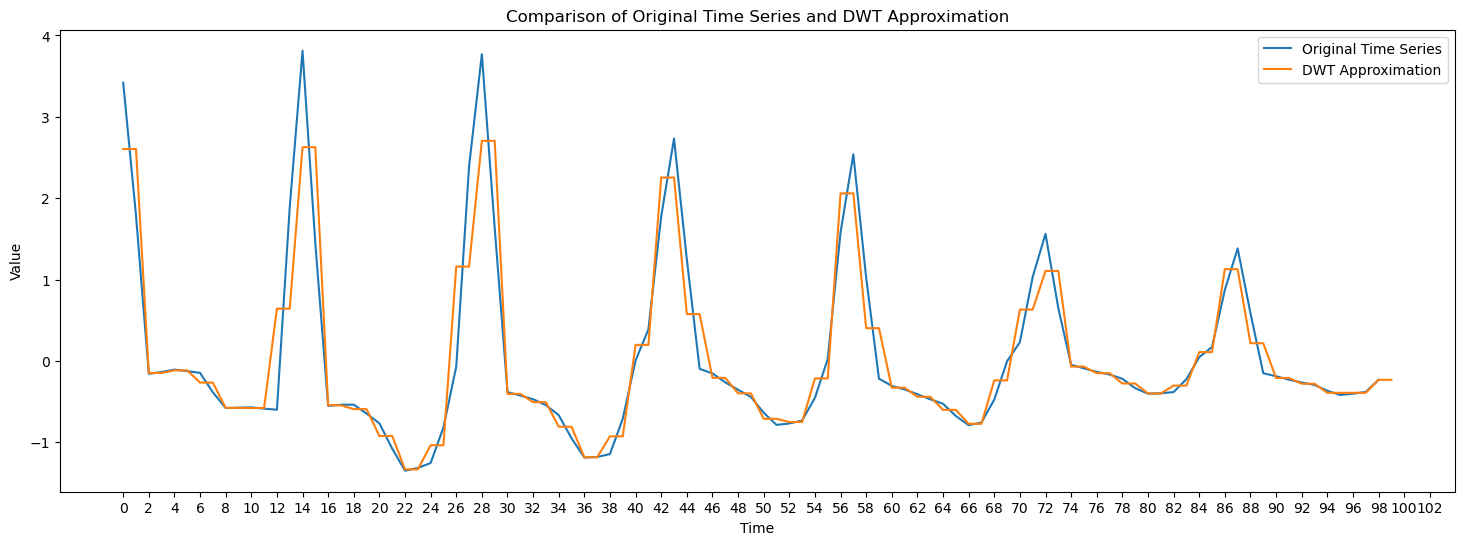

In [64]:
import pandas as pd
import pywt

# Select the first row for demonstration
row = ts_transformed.iloc[3]

# Extract the time series data (columns '0' to '15')
time_series = row[1:100].astype(float)

# Apply Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(time_series, 'db1', level=1)
approximation = coeffs[0]

# Plot the original time series and its DWT approximation
plt.figure(figsize=(18, 6))
plt.plot(time_series, label='Original Time Series')
plt.xticks(ticks=ts_transformed.index[::2], labels=ts_transformed.index[::2])
plt.plot(pywt.waverec([approximation] + [None]*(len(coeffs)-1), 'db1'), label='DWT Approximation')
plt.legend()
plt.title('Comparison of Original Time Series and DWT Approximation')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()



In [65]:
import pandas as pd
import pywt

# Select only the columns representing the time series (0 to 15)
time_series_columns = [str(i) for i in range(100)]
time_series_df = ts_transformed[time_series_columns]

# Apply DWT to each time series
dwt_results = {}
for index, row in time_series_df.iterrows():
    coeffs = pywt.wavedec(row, 'db1', level=1)
    dwt_results[ts_transformed['id'][index]] = coeffs

# Collect DWT results in a list of dictionaries
dwt_data = []
for movie_id, coeffs in dwt_results.items():
    dwt_data.append({
        'id': movie_id,
        'approximation': coeffs[0],
        'detail_level_1': coeffs[1],
        'detail_level_2': coeffs[2] if len(coeffs) > 2 else None,
        'detail_level_3': coeffs[3] if len(coeffs) > 3 else None,
        'detail_level_4': coeffs[4] if len(coeffs) > 4 else None
    })

# Create the DataFrame from the list of dictionaries
dwt_df = pd.DataFrame(dwt_data)

# Save the DWT results to a CSV file
dwt_df.to_csv('dwt_df.csv', index=False)

print("DWT results have been saved to dwt_df.csv")

DWT results have been saved to dwt_df.csv


In [66]:
dwt_df

,id,approximation,detail_level_1,detail_level_2,detail_level_3,detail_level_4
0,tt0062622,"[3.9502082942542684, 5.106089901145289, 4.0027...","[-0.4391525259548925, -0.07220018347546597, 1....",None,None,None
1,tt0064816,"[1.5762979448414702, 3.0564997633745974, 3.156...","[-0.5076430979024265, -0.09562815872310226, 0....",None,None,None
2,tt0088178,"[3.394552036843192, 2.6152843916186335, 2.0580...","[0.22305010399418101, 0.039482111958735855, 0....",None,None,None
3,tt0145487,"[3.6829332920447992, -0.2094207581081644, -0.1...","[1.1542949254686234, -0.015375254440937944, 0....",None,None,None
4,tt0359950,"[5.151597314610671, 3.1321460984283345, 3.0232...","[0.6681033342117231, 0.054940627535853936, -0....",None,None,None
...,...,...,...,...,...,...
1129,tt9731534,"[5.78836663157297, 5.222318080618075, 3.018083...","[0.05037030651812957, 0.40573025622198244, 0.7...",None,None,None
1130,tt9735462,"[4.134346227420567, 4.036616516449561, 2.82850...","[-0.04436055316421372, 0.24018395913218504, 0....",None,None,None
1131,tt9764362,"[5.562248089995457, 4.426291899103504, 2.41738...","[0.19492279847926985, 0.578875544359255, 0.510...",None,None,None
1132,tt9784798,"[4.204261914172834, 5.511460178335183, 5.03327...","[-0.39946645398578373, -0.2030142932035499, 1....",None,None,None


In [67]:
import pandas as pd
import numpy as np
import pywt

# Load the DataFrame with DWT coefficients
dwt_df = pd.read_csv('dwt_df.csv')

# Function to convert string representation of array to numpy array
def str_to_array(s):
    return np.fromstring(s.strip('[]'), sep=' ')

# Convert string coefficients to numpy arrays
dwt_df['approximation'] = dwt_df['approximation'].apply(lambda x: str_to_array(x) if pd.notnull(x) else None)

# Reconstruct the time series using only the approximation coefficients
reconstructed_series = []
for index, row in dwt_df.iterrows():
    coeffs = [row['approximation']] + [None] * (1)  # ad esempio, desired_level = 1
    
    # Reconstruct the time series using the inverse DWT
    reconstructed_series.append(pywt.waverec(coeffs, 'db1'))

# Create a DataFrame with the reconstructed time series
reconstructed_df = pd.DataFrame(reconstructed_series)

# Load the original metadata
metadata = pd.read_csv('ts_transformed.csv')

reconstructed_df = pd.concat([
    ts_scaled[['id']],
    reconstructed_df,
    ts_scaled[['rating', 'genre', 'rating_category']]
], axis=1)


# Save the final DataFrame to a CSV file
reconstructed_df.to_csv('ts_approx.csv', index=False)

print("Reconstructed time series with metadata have been saved to ts_approx.csv")

Reconstructed time series with metadata have been saved to ts_approx.csv


In [68]:
reconstructed_df

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,2.793219,2.793219,3.610551,3.610551,2.830355,2.830355,0.422104,0.422104,0.425833,...,-0.870211,-0.901810,-0.901810,-0.834588,-0.834588,-0.669062,-0.669062,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1.114611,1.114611,2.161272,2.161272,2.231768,2.231768,1.308837,1.308837,-0.050024,...,-0.652843,-0.866491,-0.866491,-0.925478,-0.925478,-0.995256,-0.995256,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,2.400311,2.400311,1.849285,1.849285,1.455244,1.455244,0.298985,0.298985,0.363894,...,-0.059852,-0.051654,-0.051654,-0.003366,-0.003366,-0.021903,-0.021903,8.7,"['Documentary', 'Music']",High
3,tt0145487,2.604227,2.604227,-0.148083,-0.148083,-0.116402,-0.116402,-0.267023,-0.267023,-0.577513,...,-0.280944,-0.392818,-0.392818,-0.392691,-0.392691,-0.105630,-0.105630,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,3.642729,3.642729,2.214762,2.214762,2.137778,2.137778,2.027872,2.027872,1.337706,...,-0.633690,-0.647411,-0.647411,-0.668688,-0.668688,-0.672188,-0.672188,7.3,"['Adventure', 'Comedy', 'Drama']",High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,tt9731534,4.092993,4.092993,3.692737,3.692737,2.134107,2.134107,0.745083,0.745083,0.826765,...,-0.591711,-0.593637,-0.593637,-0.595269,-0.595269,-0.595491,-0.595491,6.4,"['Horror', 'Mystery', 'Thriller']",Medium
1130,tt9735462,2.923424,2.923424,2.854319,2.854319,2.000057,2.000057,0.849041,0.849041,2.352244,...,-0.704284,-0.725486,-0.725486,-0.712199,-0.712199,-0.702386,-0.702386,6.3,"['Biography', 'Comedy', 'Drama']",Medium
1131,tt9764362,3.933103,3.933103,3.129861,3.129861,1.709349,1.709349,0.499722,0.499722,0.731868,...,-0.516117,-0.730246,-0.730246,-0.823315,-0.823315,-0.872869,-0.872869,7.2,"['Comedy', 'Horror', 'Thriller']",High
1132,tt9784798,2.972862,2.972862,3.897191,3.897191,3.559060,3.559060,0.356621,0.356621,-0.057927,...,-0.561786,-0.585373,-0.585373,-0.617486,-0.617486,-0.615631,-0.615631,7.4,"['Biography', 'Drama', 'History']",High


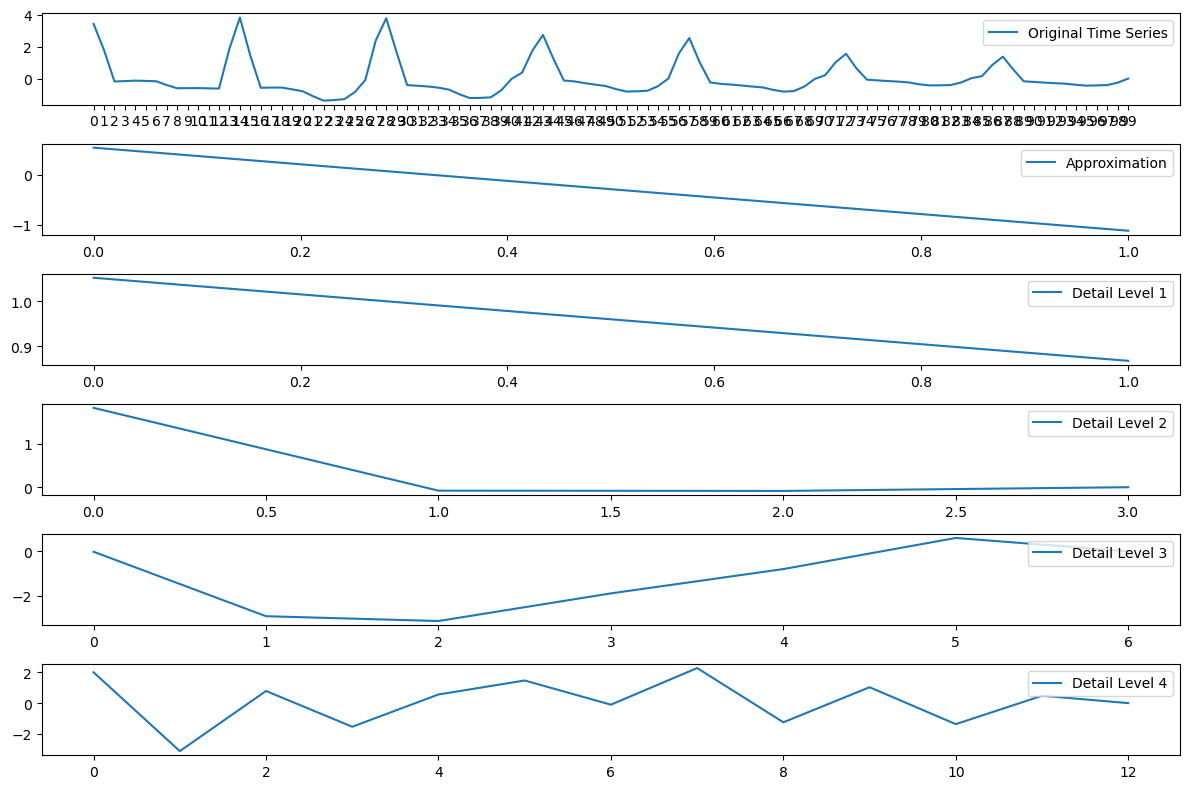

In [69]:
# Apply DWT to the first time series
row = time_series_df.iloc[3]
coeffs = pywt.wavedec(row, 'db1')

# Plot the original time series and the DWT components
plt.figure(figsize=(12, 8))

# Plot original time series
plt.subplot(6, 1, 1)
plt.plot(row, label='Original Time Series')
plt.legend(loc='upper right')

# Plot approximation
plt.subplot(6, 1, 2)
plt.plot(coeffs[0], label='Approximation')
plt.legend(loc='upper right')

# Plot detail levels
for i in range(1, 5):
    plt.subplot(6, 1, i + 2)
    plt.plot(coeffs[i], label=f'Detail Level {i}')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
